<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/Complexity_Learning_Analysis_Lending_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p></p>
<p style="font-size:35px;text-align:center;color:blue">Complexity and learning curve analysis for classification</p>
<p style="font-size:25px;text-align:center;color:red">(Using Lending data set)</p>
<p style="font-size:20px;text-align:center">Dr. Tirthajyoti Sarkar, Sunnyvale, CA</p>

## About this Notebook
<p style="font-size:16px;font-family:cambria">
Complexity and learning curve analyses are some of the most important tasks in a Machine Learning project.
<br><br>
<b>Learning curve</b>: Graphs that compares the performance of a model on training and testing data over a varying number of training instances. We should generally see performance improve as the number of training points increases.
<br><br>
<b>Complexity curve</b>: Graphs that show the model performance over training and validation set for varying degree of model complexity (e.g. degree of polynomial for linear regression, number of layers or neurons for neural networks, number of estimator trees for a Boosting algorithm or Random Forest). Complexity curve allows us to verify when a model has learned as much as it can about the data without fitting to the noise. The optimum learning (given the fixed data) occurs when
<ul style="font-size:16px;font-family:cambria">
<li>The performances on the training and testing sets reach a plateau</li>
<li>There is a consistent gap between the two error rates</li>
</ul>
<p style="font-size:16px;font-family:cambria">
<b>The key is to find the sweet spot that minimizes bias and variance</b> by finding the right level of model complexity. Of course with more data any model can improve, and different models may be optimal.
</p>
<p style="font-size:16px;font-family:cambria">
In this Notebook, we show classification on two separate data sets using five (5) algorithms,
<ul style="font-size:16px;font-family:cambria">
<li>Decision Tree with some pruning</li>
<li>Boosting (ensemble of Decision Trees)</li>
<li>K-Nearest neighbor</li>
<li>Support Vector Machines (SVM)</li>
<li>Multi-layer perceptron (MLP) aka feedforward/densely connected neural network</li>
</ul>

## Loan data set from lending club
<p style="font-size:16px;font-family:cambria">
This is a dataset, publicly available from <a href="https://lendingclub.com">LendingClub.com</a>. Lending Club connects people who need money (borrowers) with people who have money (investors). We try to create a model to predict the risk of lending money to someone given a wide range of credit related data. We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
To get a feeling about the class separability of the data, we plot pairwise scatters and the corresponding kernel density estimates using Python seaborn package. We observe good overlap between the features i.e. they are not very easy to separate like some well-known datasets (e.g. Iris).
Here are the features description,
<ul style="font-size:16px;font-family:cambria">
<li><b>credit.policy</b>: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.</li>
<li><b>purpose</b>: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").</li>
<li><b>int.rate</b>: The interest rate of the loan, as a proportion. Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.</li>
<li><b>installment</b>: The monthly installments owed by the borrower if the loan is funded.</li>
<li><b>log.annual.inc</b>: The natural log of the self-reported annual income of the borrower.</li>
<li><b>dti</b>: The debt-to-income ratio of the borrower (amount of debt divided by annual income).</li>
<li><b>fico</b>: The FICO credit score of the borrower.</li>
<li><b>days.with.cr.line</b>: The number of days the borrower has had a credit line.</li>
<li><b>revol.bal</b>: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).</li>
<li><b>revol.util</b>: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).</li>
<li><b>inq.last.6mths</b>: The borrower's number of inquiries by creditors in the last 6 months.</li>
<li><b>delinq.2yrs</b>: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.</li>
<li><b>pub.rec</b>: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).</li>
<li><b>not.fully.paid</b>: The quantity of interest for classification - whether the borrower paid back the money in full or not</li>

## Import initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

## Dataset operations

### Load the dataset

In [2]:
df=pd.read_csv("loan_data.csv")

### Look at first 5 rows

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Basic descriptive statistics

In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### One-hot encoding of categorical features

In [5]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)
df_final = df_final.drop('credit.policy',axis=1)

In [6]:
df_final.shape

(9578, 18)

## Basic visualizations
<p style="font-size:16px;font-family:cambria">
We plot histograms, boxlots and scatterplots of the dataset and observe that <b>the class separation is not very obvious</b>. Particularly, boxplots show lot of overlap between features for two output classes.
<br><br>
So, <b>this should be a non-trivial classification task</b>.</p>

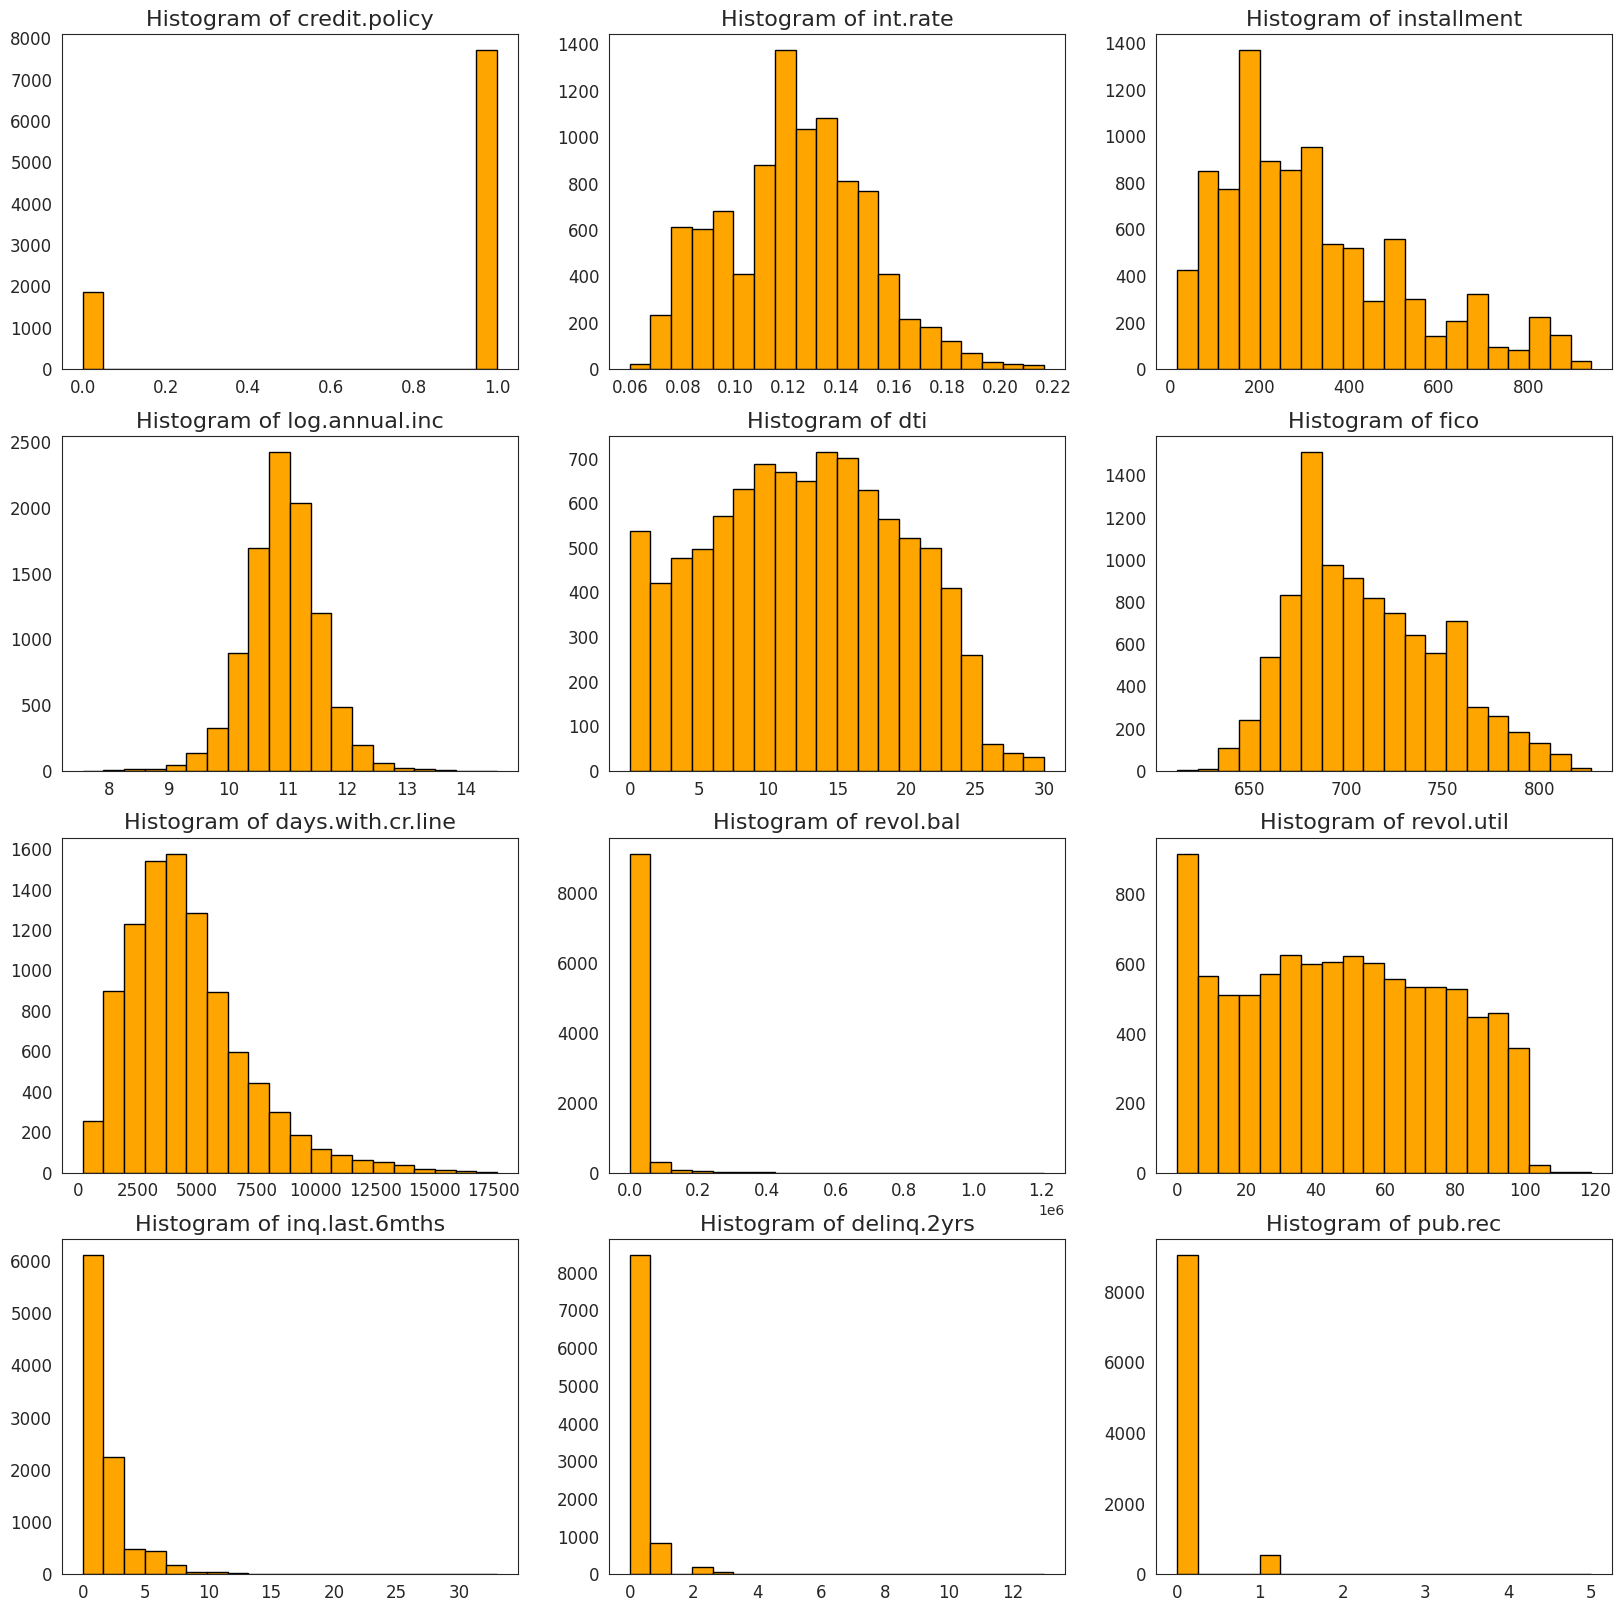

In [7]:
i=1
plt.figure(figsize=(20,20))
for c in df.describe().columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show()

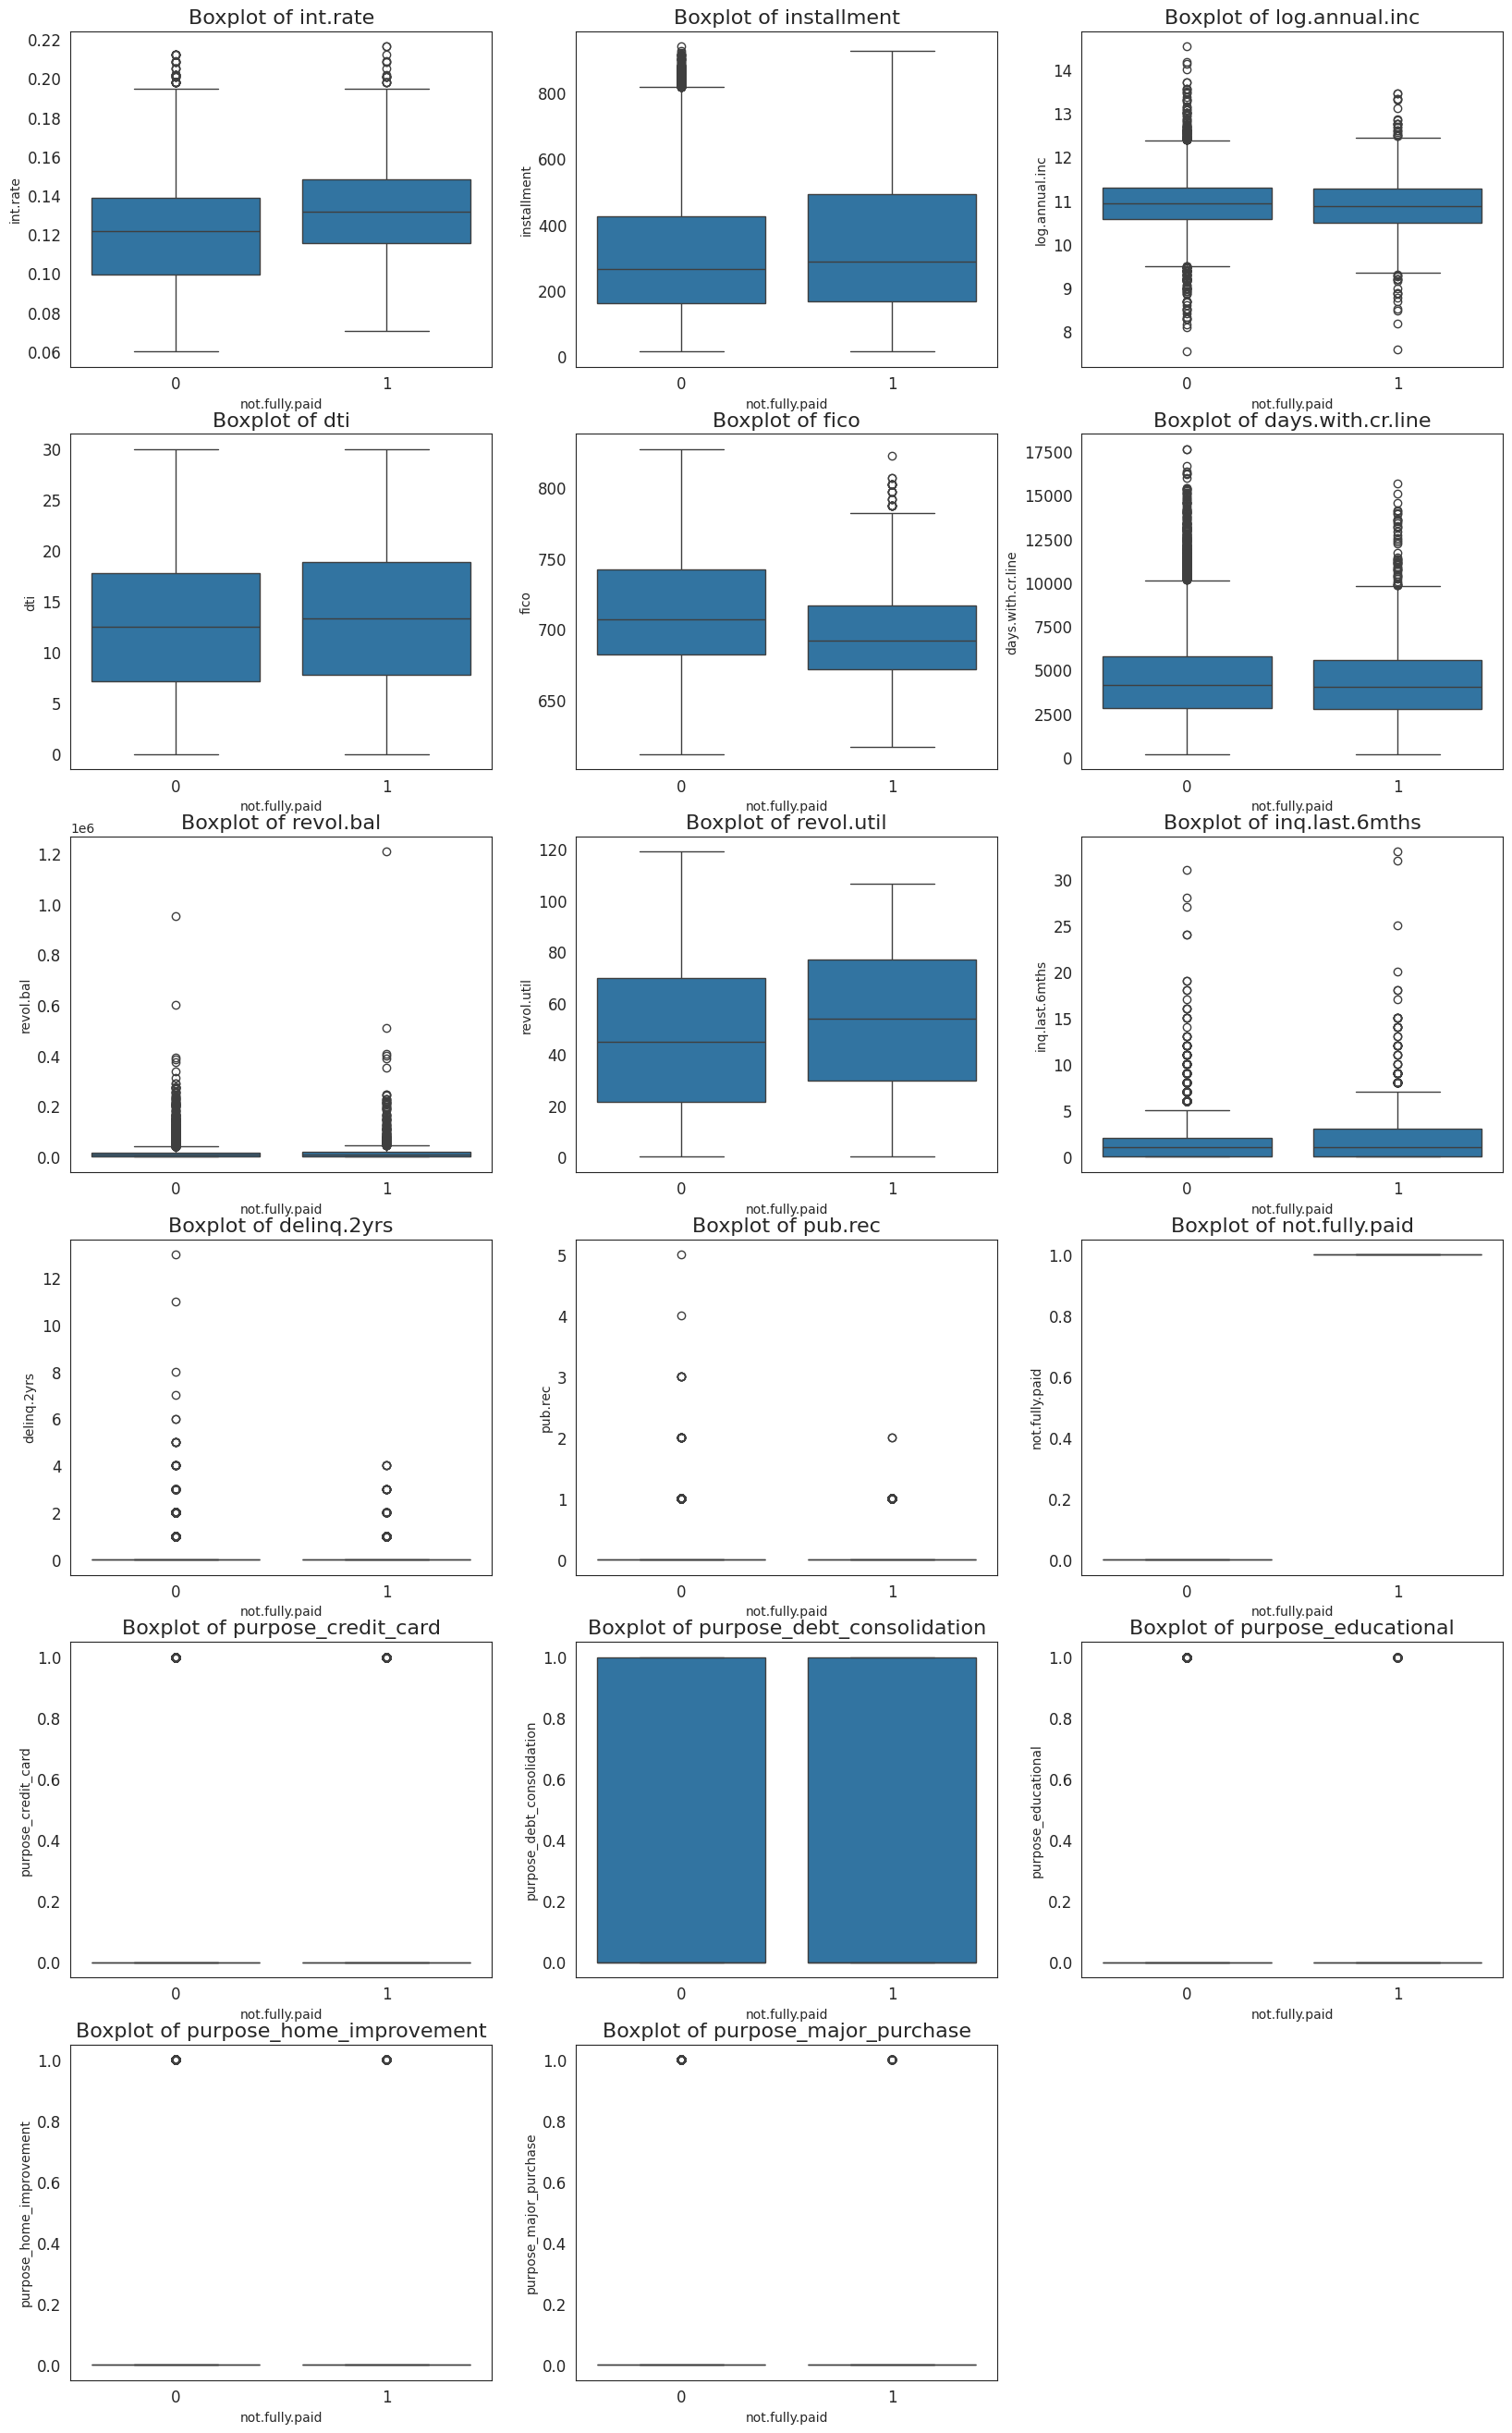

In [8]:
i=1
plt.figure(figsize=(20,33))
for c in df_final.columns[:-1]:
    plt.subplot(6,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df_final[c],x=df_final['not.fully.paid'])
    i+=1
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

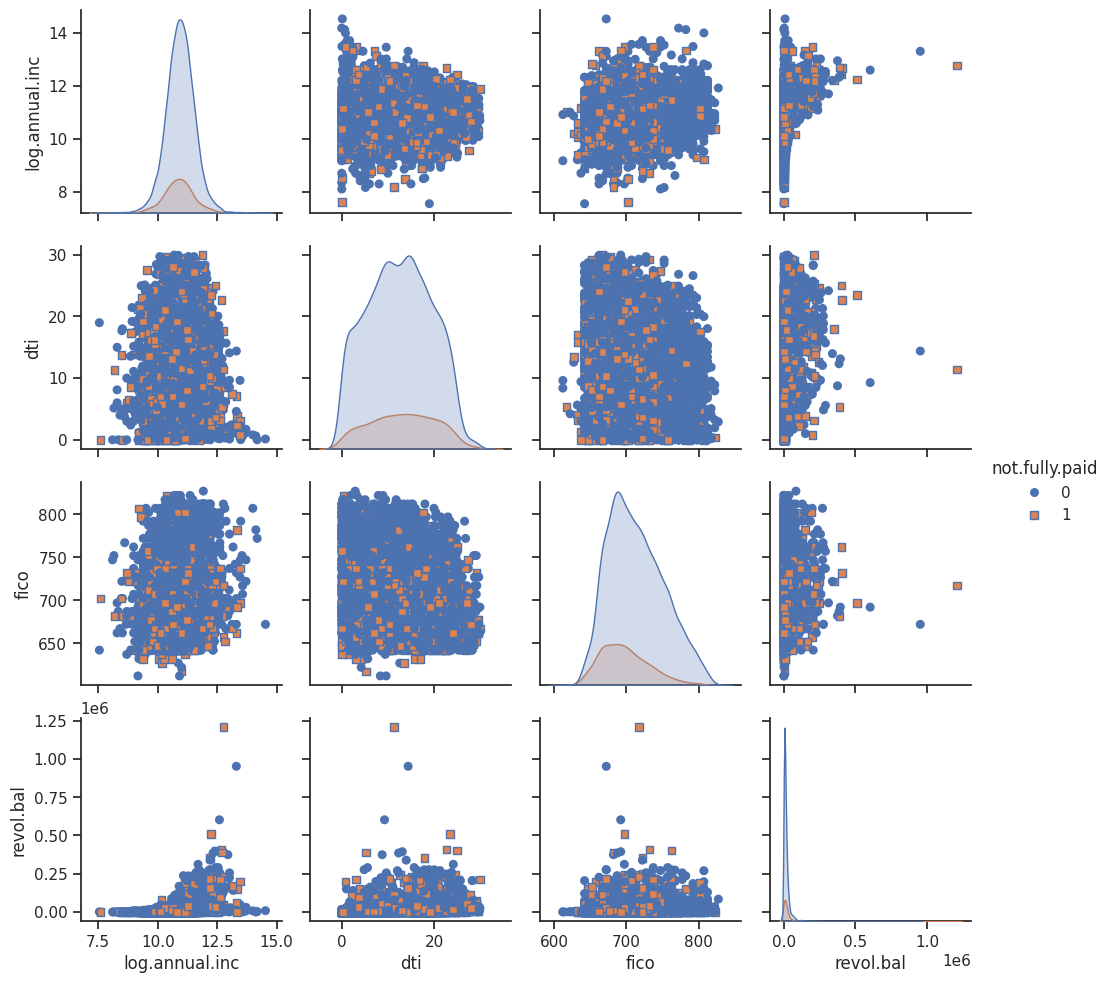

In [9]:
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(df_final,vars=["log.annual.inc","dti","fico","revol.bal"],
               plot_kws=dict(s=30, edgecolor="b", linewidth=1),
               hue="not.fully.paid",markers=["o", "s"],
               diag_kind="kde",diag_kws=dict(shade=True))

## Test/train/validation split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df_final.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

### First divide train and test data in 70:30 ratio

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
X_train.head(10)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
5514,0.1426,34.31,10.714418,24.61,662,2554.000000,7153,53.4,0,1,0,False,True,False,False,False,False
4798,0.1183,298.21,10.858999,20.49,712,4619.958333,23750,47.7,1,0,0,False,True,False,False,False,False
5739,0.0894,301.04,10.203592,7.07,752,3840.041667,7866,44.7,0,0,0,False,True,False,False,False,False
2313,0.1189,232.15,10.898072,17.95,712,4920.041667,14968,28.1,1,0,0,False,False,False,False,False,False
5818,0.1253,334.67,11.338572,20.86,702,5640.041667,52537,48.9,1,0,0,False,False,False,False,False,False
7606,0.1273,570.63,11.099680,22.75,707,3750.000000,26146,76.2,0,0,0,False,True,False,False,False,False
4697,0.1114,393.65,11.418615,14.36,737,3899.958333,3114,26.4,1,0,0,False,False,False,True,False,False
109,0.1028,323.99,11.695247,14.40,722,4679.958333,56740,77.5,1,0,0,False,True,False,False,False,False
2702,0.0800,263.23,11.156251,3.05,777,4020.958333,1506,6.6,0,0,0,False,False,False,False,False,False
6834,0.1531,174.08,11.350407,9.06,662,5250.041667,9523,75.0,0,0,0,False,True,False,False,False,False


In [14]:
y.head()

,not.fully.paid
0,0
1,0
2,0
3,0
4,0


### Then further divide the test set in 50:50 ratio into validation set and test set

In [15]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

In [16]:
X_test.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8230,0.1039,30.02,12.209068,11.85,732,9779.000000,133963,16.8,15,0,0,False,False,False,True,False,False
9470,0.1496,97.88,10.790205,13.60,677,3540.041667,914,50.8,6,0,0,False,True,False,False,False,False
5609,0.1392,392.58,11.082143,14.88,682,3390.000000,10104,80.8,1,0,0,True,False,False,False,False,False
6102,0.0894,190.63,11.561716,10.42,727,4560.041667,10465,44.0,0,0,0,False,False,False,False,False,False
5369,0.1218,499.50,11.595427,12.25,727,6035.000000,24573,87.4,1,0,0,False,False,False,False,False,False


In [17]:
X_val.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
9194,0.1632,367.26,11.097410,8.87,667,2910.000000,13991,96.2,4,0,0,False,True,False,False,False,False
2740,0.1379,340.76,10.448715,14.71,692,2520.000000,8316,52.6,0,0,0,True,False,False,False,False,False
9268,0.1392,273.10,10.505068,7.33,722,6900.000000,49084,98.4,1,0,0,False,True,False,False,False,False
2417,0.0963,208.62,10.373241,3.75,742,3450.041667,883,13.8,1,0,0,False,False,True,False,False,False
2668,0.1632,529.71,11.082143,16.39,672,5310.000000,7467,48.8,2,0,0,False,False,False,False,False,False


### Show the shape of these sets

In [18]:
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)
print("Shape of training set:", X_train.shape)

Shape of validation set: (1437, 17)
Shape of test set: (1437, 17)
Shape of training set: (6704, 17)


## Decision Tree model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

### Predictions and evaluation

In [22]:
predictions = dtree.predict(X_val)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [24]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.8169798190675017


### Varying hyperparameters: _Pruning_ the tree
<p style="font-size:16px;font-family:cambria">
**Pruning** is important to increase the robustness of a decision tree classifier i.e. increase its chance of performing better with unseen test data.
<p style="font-size:16px;font-family:cambria">
One way to prune the tree is to not let it grow indefinitely. We test this by setting the `max_depth` parameter. As expected, we see an increase in the validation set accuracy, accompanied by a decrease in training set accuracy for smaller trees. This means that for this dataset, a **deeper tree clearly overfits the data** and a shallow tree of depth 2/3 should be considered.
<p style="font-size:16px;font-family:cambria">
Similarly, we tweak the `min_samples_leaf` parameter to limit overfitting. If we allow a single leaf per node then the algorithm will fit to the noise of the data down to a single data point (splitting data on as low as two points) thereby making the decision boundary extremely nonlinear and vulnerable to the nosie.

#### Varying *`max_depth`*

In [25]:
val_acc_max_depth=[]
val_f1_max_depth=[]
train_acc_max_depth=[]
train_f1_max_depth=[]
for i in range(3,21):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=1)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_max_depth.append(acc_train)
    train_f1_max_depth.append(f1_train)
    val_acc_max_depth.append(acc_val)
    val_f1_max_depth.append(f1_val)

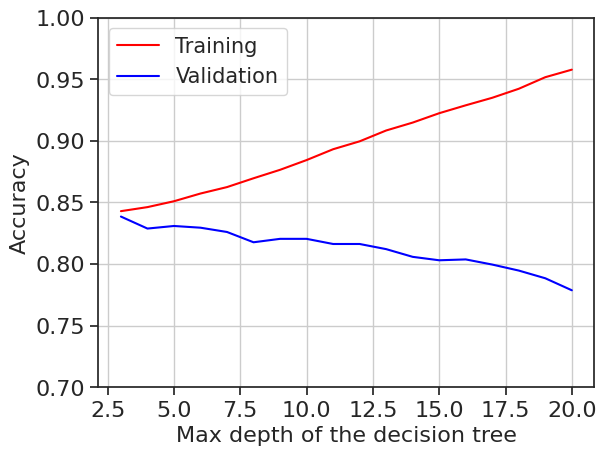

In [26]:
plt.plot(range(3,21),train_acc_max_depth,c='red')
plt.plot(range(3,21),val_acc_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max depth of the decision tree", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.7,1.0)
plt.show()

#### Varying *`min_samples_leaf`* with *`max_depth`* = 20

In [27]:
val_acc_min_samples_leaf=[]
val_f1_min_samples_leaf=[]
train_acc_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
for i in range(1,41):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_min_samples_leaf.append(acc_train)
    train_f1_min_samples_leaf.append(f1_train)
    val_acc_min_samples_leaf.append(acc_val)
    val_f1_min_samples_leaf.append(f1_val)

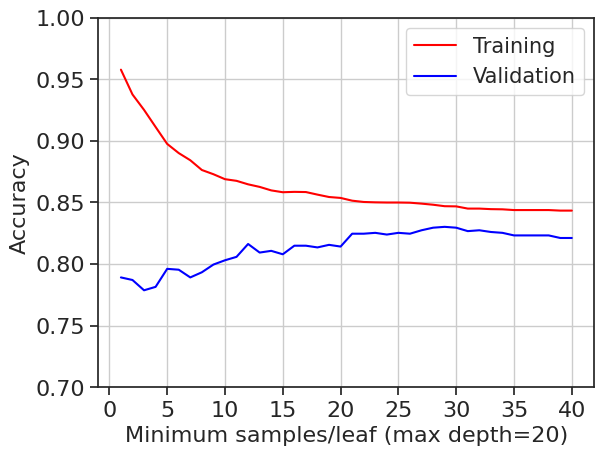

In [28]:
plt.plot(range(1,41),train_acc_min_samples_leaf,c='red')
plt.plot(range(1,41),val_acc_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Minimum samples/leaf (max depth=20)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.7,1.0)
plt.show()

### LEARNING CURVE: Varying training set size
<p style="font-size:16px;font-family:cambria">
We run a loop over a range of fractions (10% to 100%) and **sample random points up to that fraction from the original data set**.
<p style="font-size:16px;font-family:cambria">
For each iteration, we run a decision tree model and **calculate prediction accuracy over the sampled training data and original validation set**.
<p style="font-size:16px;font-family:cambria">
The plot shows that for this dataset and a sensible choice of hyperparameters, the accuracy is not a strong function of training data size down to small fraction of the original data. This means, in principle, **we can run the algorithm on a much smaller model than using all the data and still create decent predictions.**

In [29]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=20)
    # Sampling
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    # Fitting and Predictions
    dtree.fit(X_train_sampled,y_train_sampled)
    pred_train = dtree.predict(X_train_sampled)
    pred_val = dtree.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


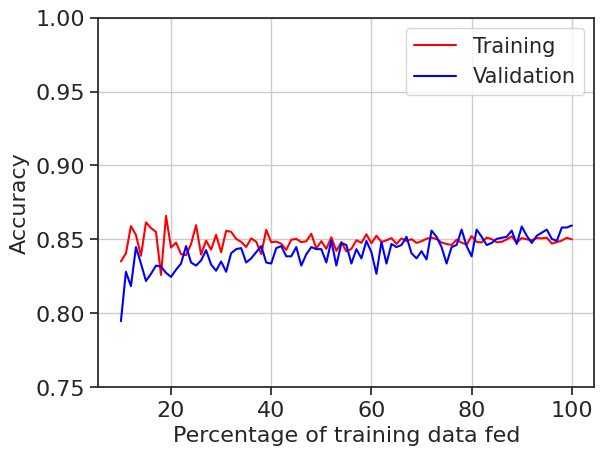

In [30]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.75,1.0)
plt.show()

## Boosting algorithm model
<p style="font-size:16px;font-family:cambria">
We use **`AdaBoost`** meta-learner. Adaboost is one of the earliest meta-learning algorithms, formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work.

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=2),
                            n_estimators=20,learning_rate=0.01)

In [33]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=2),
                   learning_rate=0.01, n_estimators=20)

### Predictions and evaluation

In [34]:
predictions = adaboost.predict(X_val)

In [35]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.826722338204593


### Varying number of estimators
<p style="font-size:16px;font-family:cambria">
Adaboost works by combining multiple ‘weak learners’ and dynamically updating the weights of those learners and training data depending on whether in a given pass, those training data was correctly classified or not. Therefore, it is expected that with **increasing number of estimators, training accuracy should reach very high and the validation accuracy also should increase to the point where it hits the irreducible error rate**.
<p style="font-size:16px;font-family:cambria">
We observe this trend in the result. Also, the biggest different between a meta-learner like Adaboost and a single decision tree is that the **validation accuracy does not drop back sharply with increase in estimators i.e. model complexity.**

In [36]:
val_acc_num_trees=[]
val_f1_num_trees=[]
train_acc_num_trees=[]
train_f1_num_trees=[]
val_range=(1,53,3)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=i,learning_rate=0.2)
    adaboost.fit(X_train,y_train)
    pred_train = adaboost.predict(X_train)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_num_trees.append(acc_train)
    train_f1_num_trees.append(f1_train)
    val_acc_num_trees.append(acc_val)
    val_f1_num_trees.append(f1_val)
    print(f"Done for number of trees: {i}")

Done for number of trees: 1
Done for number of trees: 4
Done for number of trees: 7
Done for number of trees: 10
Done for number of trees: 13
Done for number of trees: 16
Done for number of trees: 19
Done for number of trees: 22
Done for number of trees: 25
Done for number of trees: 28
Done for number of trees: 31
Done for number of trees: 34
Done for number of trees: 37
Done for number of trees: 40
Done for number of trees: 43
Done for number of trees: 46
Done for number of trees: 49
Done for number of trees: 52


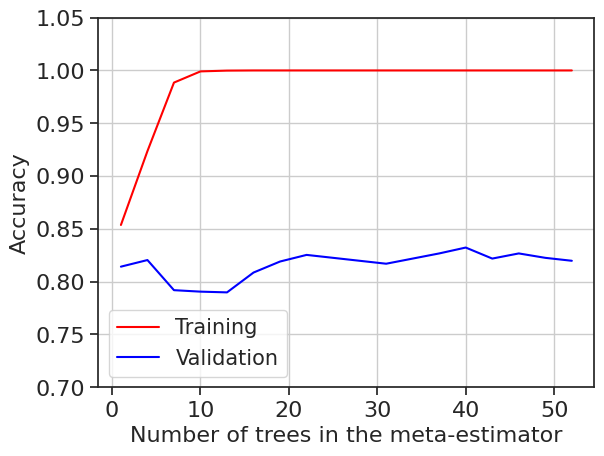

In [37]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_num_trees,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.7,1.05)
plt.show()

### LEARNING CURVE: Varying training set size
<p style="font-size:16px;font-family:cambria">
The learning curve is plotted following the similar process as described above with decision tree. Training accuracy is almost 1.0 for all data set size and validation accuracy approaches training accuracy with increase in the training set size. We used 20 tree estimators for this exercise.

In [38]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=20,learning_rate=0.2)
    # Sampling
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    # Fitting and prediction
    adaboost.fit(X_train_sampled,y_train_sampled)
    pred_train = adaboost.predict(X_train_sampled)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)

    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


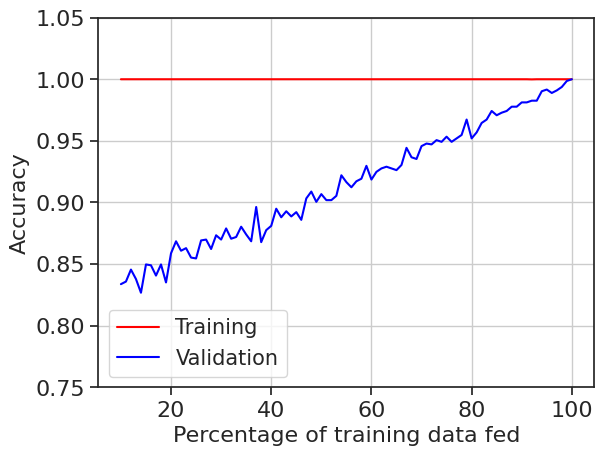

In [39]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.75,1.05)
plt.show()

## SVM model
<p style="font-size:16px;font-family:cambria">
SVM is one of the most widely used non-probabilistic binary classifiers. We use `svc` method from Scikit-learn for this exercise.
<p style="font-size:16px;font-family:cambria">
But, SVM requires normalizing the data to the same scale. So, we use `StandardScaler` function to pre-process the data to the same scale and then apply SVM. Default model shows ~ 83% accuracy on the validation set.

### Scaling the data using `StandardScaler`

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
X_train_scaled=StandardScaler().fit_transform(X_train)
X_val_scaled=StandardScaler().fit_transform(X_val)

In [42]:
from sklearn.svm import SVC

In [43]:
svc_clf=SVC(kernel="poly", C=1,degree=2)

In [44]:
svc_clf.fit(X_train_scaled,y_train)

SVC(C=1, degree=2, kernel='poly')

### Predictions and evaluation

In [45]:
predictions=svc_clf.predict(X_val_scaled)

In [46]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.8475991649269311


### Varying degree of polynomial kernel
<p style="font-size:16px;font-family:cambria">
We play with polynomial and rbf (radial basis function i.e. Gaussian) kernels. The degree of polynomial does not seem to improve validation accuracy i.e. a lower degree kernel or even a linear classifier is good enough. In fact, the result shows the **familiar gap between training and validation accuracy as the model complexity (degree) increases.**
<p style="font-size:16px;font-family:cambria">
A higher degree kernel surely overfits the training data. Further, we also examine the effect of regularization parameter C and observe that this gap saturates quicker for a large value of C. This means that, **increasing strength of regularization imposes more penalty on a complex, higher degree model in terms of validation accuracy while the training accuracy can saturate to 1.0 due to over-fitting and not depending on the regularization.**

In [47]:
val_acc_degree=[]
val_f1_degree=[]
train_acc_degree=[]
train_f1_degree=[]
val_range=(1,11,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    svc_clf=SVC(kernel="poly", C=0.01,degree=i)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_degree.append(acc_train)
    train_f1_degree.append(f1_train)
    val_acc_degree.append(acc_val)
    val_f1_degree.append(f1_val)
    print(f"Done for number of degree: {i}")

Done for number of degree: 1
Done for number of degree: 2
Done for number of degree: 3
Done for number of degree: 4
Done for number of degree: 5
Done for number of degree: 6
Done for number of degree: 7
Done for number of degree: 8
Done for number of degree: 9
Done for number of degree: 10


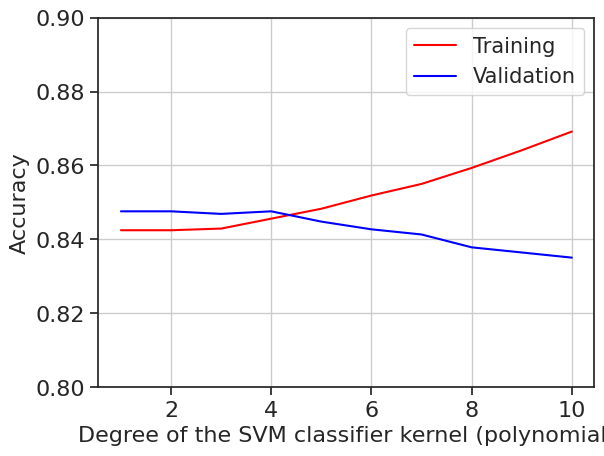

In [48]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_degree,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_degree,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Degree of the SVM classifier kernel (polynomial)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.8,0.9)
plt.show()

#### But what if we put a penalty for misclassification? `C` = 10

In [49]:
val_acc_degree=[]
val_f1_degree=[]
train_acc_degree=[]
train_f1_degree=[]
val_range=(1,11,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    svc_clf=SVC(kernel="poly", C=1,degree=i)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_degree.append(acc_train)
    train_f1_degree.append(f1_train)
    val_acc_degree.append(acc_val)
    val_f1_degree.append(f1_val)
    print(f"Done for number of degree: {i}")

Done for number of degree: 1
Done for number of degree: 2
Done for number of degree: 3
Done for number of degree: 4
Done for number of degree: 5
Done for number of degree: 6
Done for number of degree: 7
Done for number of degree: 8
Done for number of degree: 9
Done for number of degree: 10


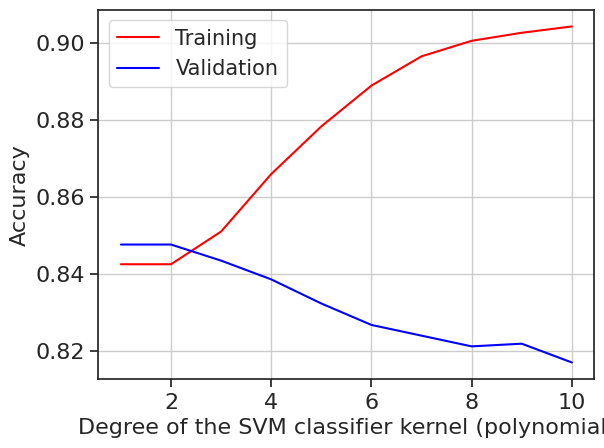

In [50]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_degree,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_degree,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Degree of the SVM classifier kernel (polynomial)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

### Varying regularization parameter _C_ (i.e. $\frac{1}{\lambda}$ in the Lagrangian formulation of SVM)

In [51]:
val_acc_C=[]
val_f1_C=[]
train_acc_C=[]
train_f1_C=[]
C_range=[]
val_range=(-8,2,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    C=2**(i)
    C_range.append(C)
    # Fitting
    svc_clf=SVC(kernel="poly", C=C,degree=2)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_C.append(acc_train)
    train_f1_C.append(f1_train)
    val_acc_C.append(acc_val)
    val_f1_C.append(f1_val)
    print(f"Done for number of C: {2**(i)}")

Done for number of C: 0.00390625
Done for number of C: 0.0078125
Done for number of C: 0.015625
Done for number of C: 0.03125
Done for number of C: 0.0625
Done for number of C: 0.125
Done for number of C: 0.25
Done for number of C: 0.5
Done for number of C: 1
Done for number of C: 2


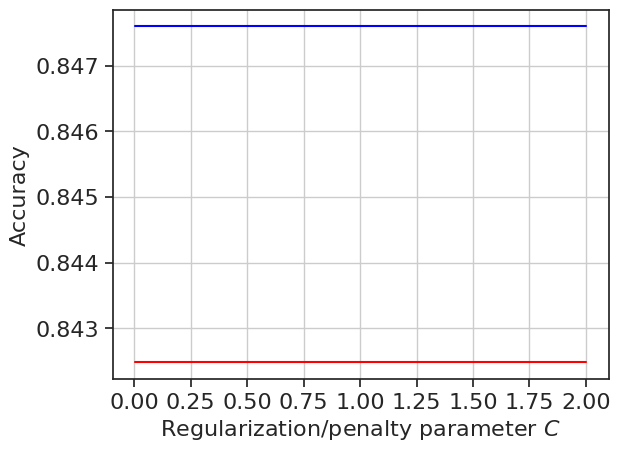

In [52]:
plt.plot(C_range,train_acc_C,c='red')
plt.plot(C_range,val_acc_C,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Regularization/penalty parameter $C$", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.81,0.85)
plt.show()

### Radial basis function (`RBF`) kernel - varying `gamma`

In [53]:
val_acc_gamma=[]
val_f1_gamma=[]
train_acc_gamma=[]
train_f1_gamma=[]
gamma_range=[]
val_range=(-5,2,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    gamma=10**(i)
    gamma_range.append(gamma)
    # Fitting
    svc_clf=SVC(kernel="rbf", C=10,gamma=gamma)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_gamma.append(acc_train)
    train_f1_gamma.append(f1_train)
    val_acc_gamma.append(acc_val)
    val_f1_gamma.append(f1_val)
    print(f"Done for gamma: {gamma}")

Done for gamma: 1e-05
Done for gamma: 0.0001
Done for gamma: 0.001
Done for gamma: 0.01
Done for gamma: 0.1
Done for gamma: 1
Done for gamma: 10


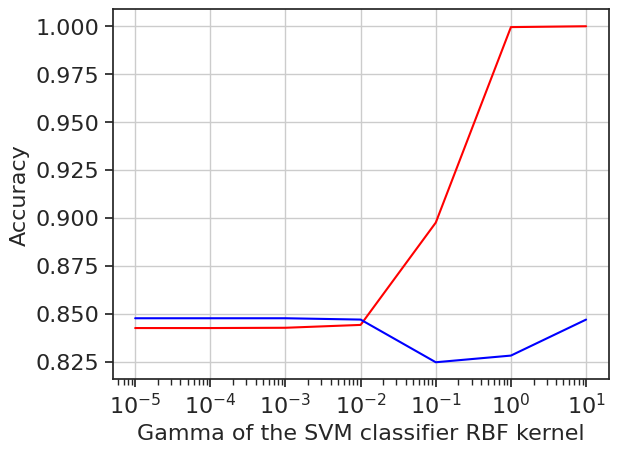

In [54]:
plt.semilogx(gamma_range,train_acc_gamma,c='red')
plt.semilogx(gamma_range,val_acc_gamma,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Gamma of the SVM classifier RBF kernel", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

### LEARNING CURVE: Varying training set size
<p style="font-size:16px;font-family:cambria">
The learning curve of the SVM model turns out pretty uninteresting for this dataset. SVM model with 2nd degree polynomial kernel is used for this experiment, and just like the single decision tree model, it shows relatively little dependence on the amount of training data. For a machine learning engineer, this is still a **very useful result indicating that this dataset can be classified using relatively simple kernel and using small amount of data** randomly sampled from the full dataset. Therefore, the whole learning process can run with high speed.

In [55]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    svc_clf=SVC(kernel="poly",C=0.001,degree=2)
    # Sampling (and scaling)
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and prediction
    svc_clf.fit(X_train_sampled,y_train_sampled)
    pred_train = svc_clf.predict(X_train_sampled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)

    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 15% training set size
Done for: 20% training set size
Done for: 25% training set size
Done for: 30% training set size
Done for: 35% training set size
Done for: 40% training set size
Done for: 45% training set size
Done for: 50% training set size
Done for: 55% training set size
Done for: 60% training set size
Done for: 65% training set size
Done for: 70% training set size
Done for: 75% training set size
Done for: 80% training set size
Done for: 85% training set size
Done for: 90% training set size
Done for: 95% training set size
Done for: 100% training set size


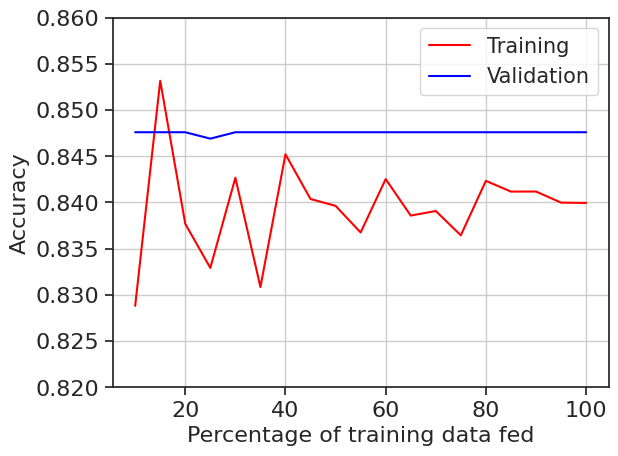

In [56]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.82,0.86)
plt.show()

## _K_-nearest neighbor model
<p style="font-size:16px;font-family:cambria">
k-Nearest Neighbor or kNN, is one of the simplest algorithms for classification. It is extremely fast and works through **lazy evaluation** i.e. it does not build any explicit model but just stores the input training data and predicts the label of a test point by calculating various distances of other points from the test point.
<p style="font-size:16px;font-family:cambria">
We use `KNeighborsClassifier` method from scikit-learn stable. For default model, we use k=3 and obtain ~80% accuracy. Just like SVM, we use the **scaled data** for this algorithm.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=KNeighborsClassifier(3)

In [59]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
predictions=knn.predict(X_val_scaled)

In [61]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.8121085594989561


### Varying number of neighbors
<p style="font-size:16px;font-family:cambria">
**Increasing the number of neighbors have a ‘smoothing effect’ on the decision boundary created by kNN** i.e. noise and irregularities in the data get ‘averaged over’ when distances from multiple neighbors are considered. Quite expectedly, **this should increase the validation accuracy**. We observe exactly this trend in the plot.
<p style="font-size:16px;font-family:cambria">
Interestingly, **when k=1, the training accuracy is always 1.0 because the model just stores the value of that point itself** (rote learning, just remembers the position). Training and validation accuracy approach one another to a plateau as k is increased. For this dataset, k=5 should be good enough.

In [62]:
val_acc_k=[]
val_f1_k=[]
train_acc_k=[]
train_f1_k=[]
val_range=(1,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    knn=KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    pred_train = knn.predict(X_train_scaled)
    pred_val = knn.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_k.append(acc_train)
    train_f1_k.append(f1_train)
    val_acc_k.append(acc_val)
    val_f1_k.append(f1_val)
    print(f"Done for number of neighbors: {i}")

Done for number of neighbors: 1
Done for number of neighbors: 2
Done for number of neighbors: 3
Done for number of neighbors: 4
Done for number of neighbors: 5
Done for number of neighbors: 6
Done for number of neighbors: 7
Done for number of neighbors: 8
Done for number of neighbors: 9
Done for number of neighbors: 10
Done for number of neighbors: 11
Done for number of neighbors: 12
Done for number of neighbors: 13
Done for number of neighbors: 14
Done for number of neighbors: 15
Done for number of neighbors: 16
Done for number of neighbors: 17
Done for number of neighbors: 18
Done for number of neighbors: 19
Done for number of neighbors: 20


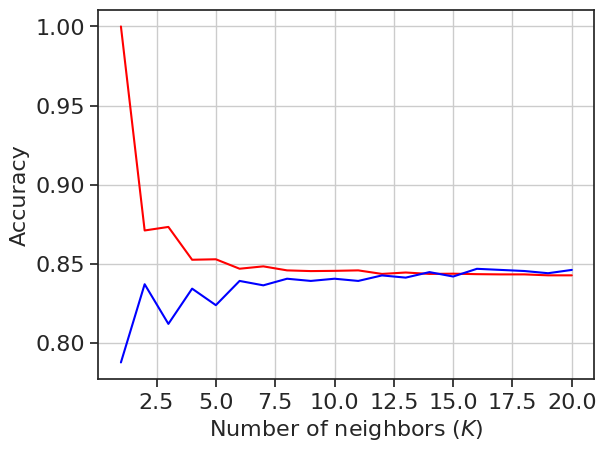

In [63]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_k,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_k,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neighbors ($K$)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.81,0.85)
plt.show()

### LEARNING CURVE: Varying training set size
<p style="font-size:16px;font-family:cambria">
Learning curve for kNN is also not super interesting for this dataset. We extract the learning curve for k=5. Validation accuracy does exhibit a little dip for very small fraction of data. Anything above 50% should be good for a decent learner.

In [64]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    knn=KNeighborsClassifier(5)
   # Sampling
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and prediction
    knn.fit(X_train_sampled,y_train_sampled)
    pred_train = knn.predict(X_train_sampled)
    pred_val = knn.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)

    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


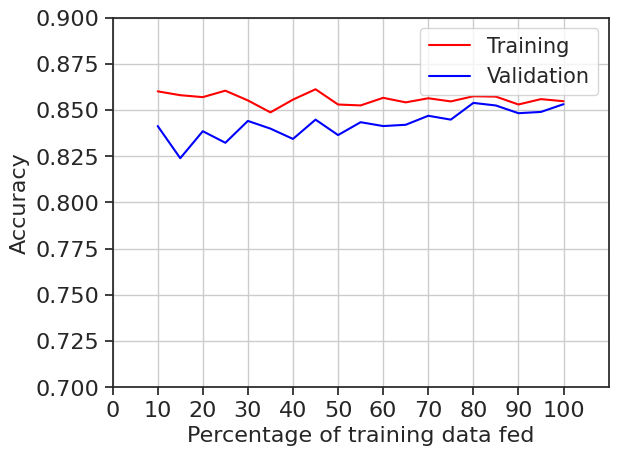

In [65]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.7,0.9)
plt.xlim(0,110)
plt.show()

## Neural Networks (Multi-layer perceptron)
<p style="font-size:16px;font-family:cambria">
We use **keras high-level API** (based on TensorFlow backend) to build our MLP. For this dataset, we chose a **2-hidden-layer** network with dropout and **binary cross-entropy** error. Because neural network has a vast number of hyperparameters, we built a couple of helper functions to easily tune them.

In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [68]:
n_input=X_train_scaled.shape[0]
num_classes = len(y_train.unique())
input_dim=X_train_scaled.shape[1]

### Function to construct 2-hidden-layer Keras model

In [86]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    #model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(1, activation='sigmoid'))

    if optimizer=='SGD':
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
    if optimizer=='Adam':
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
    if optimizer=='RMSprop':
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

    return model

### Function to run the NN model

In [87]:
def run_NN(model,X_train,y_train,X_val,y_val,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint
    checkpointer = ModelCheckpoint(filepath='model.best.keras',
                                   verbose=verbosity, save_best_only=True)

    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(X_val, y_val),
              verbose=verbosity, shuffle=False)

    if plot_loss:
        plt.plot(hist.history['accuracy'],color='red')
        plt.plot(hist.history['val_accuracy'],color='blue')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()

    return hist

### Function to test the NN model

In [88]:
def test_NN(hist,X_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(X_test, y_test,verbose=0)[1]
    return score

### Does the choice of the optimizer matter?
<p style="font-size:16px;font-family:cambria">
There are many choices of optimizers which perform backpropagation for MLP. We try two of the most common optimizers to see their impact on the speed of convergence. The results show that for this dataset, **Adam optimizer** reaches convergence faster i.e. in lesser number of epochs than conventional **stochastic gradient descent (SGD)**. Another distinct feature of this set of results is that they show that in case of MLP, the **validation accuracy tracks the training accuracy closely. This kind of parallel trend is not seen in other type of algorithms.**

### Basic run of the neural network (using Adam optimizer)

In [89]:
nn_model = make_NN_model(
    input_dim=input_dim,
    num_classes=num_classes,
    dropout_prob=0.0,
    learning_rate=0.0001,
    neuron_layer_1=10,
    neuron_layer_2=5,
    optimizer='Adam'
)


Epoch 1/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6627 - loss: 0.7231 - val_accuracy: 0.6938 - val_loss: 0.6962
Epoch 2/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6976 - loss: 0.6939 - val_accuracy: 0.7286 - val_loss: 0.6700
Epoch 3/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.6682 - val_accuracy: 0.7550 - val_loss: 0.6465
Epoch 4/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.6444 - val_accuracy: 0.7808 - val_loss: 0.6244
Epoch 5/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 0.6219 - val_accuracy: 0.7954 - val_loss: 0.6034
Epoch 6/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.6006 - val_accuracy: 0.8121 - val_loss: 0.5838
Epoch 7/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.5804 - val_accuracy: 0.8198 - val_loss: 0.5652
Epoch 8/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.5612 - val_accuracy: 0.

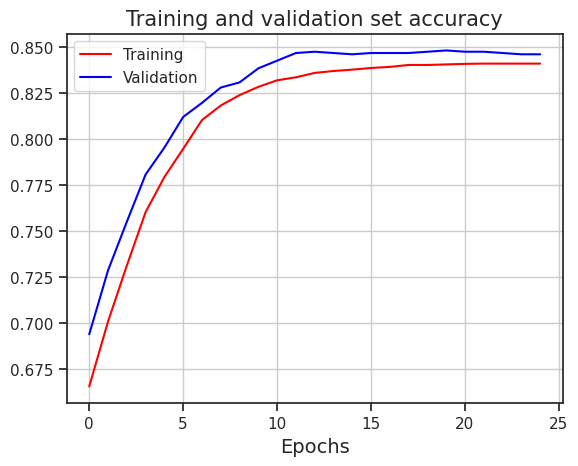

In [90]:
hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

### Basic run of the neural network (using Stochastic Gradient Descent optimizer)

In [91]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=5,optimizer='SGD')

Epoch 1/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8283 - loss: 0.5566 - val_accuracy: 0.8351 - val_loss: 0.5553
Epoch 2/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290 - loss: 0.5554 - val_accuracy: 0.8351 - val_loss: 0.5541
Epoch 3/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8289 - loss: 0.5543 - val_accuracy: 0.8365 - val_loss: 0.5530
Epoch 4/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8303 - loss: 0.5531 - val_accuracy: 0.8365 - val_loss: 0.5518
Epoch 5/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8305 - loss: 0.5520 - val_accuracy: 0.8386 - val_loss: 0.5507
Epoch 6/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.5509 - val_accuracy: 0.8386 - val_loss: 0.5495
Epoch 7/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.5498 - val_accuracy: 0.8392 - val_loss: 0.5484
Epoch 8/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.5487 - val_accuracy: 0.

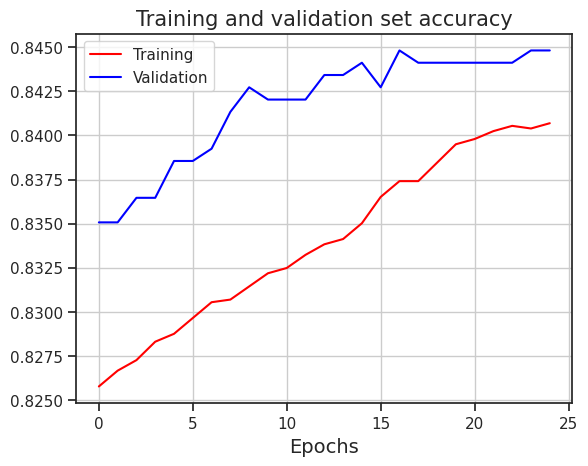

In [92]:
hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

### Varying hyperparameter - number of neurons per layer? How many epochs should we run for?
<p style="font-size:16px;font-family:cambria">
These are some of the natural questions that arise for an MLP. With our helper function, we run a loop over a wide range of neurons/hidden layer, extract training and validation accuracy, and show that the **accuracy varies wildly with the model complexity i.e. number of neurons when we train it for small number of epochs. But this variation is smoothed out with large number of epochs.**

#### Running for `num_epochs` = 5

In [93]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=5,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


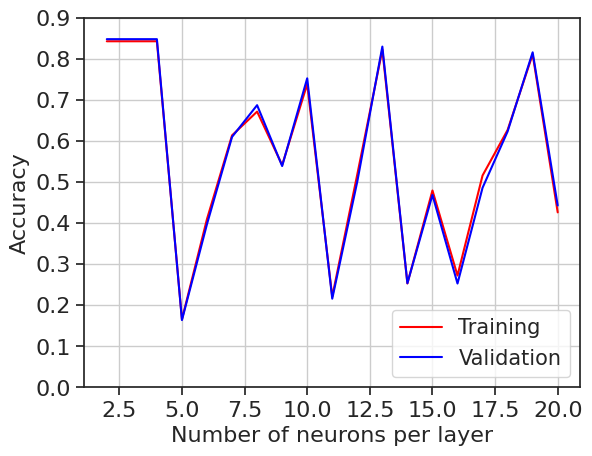

In [94]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.0,0.9)
plt.show()

#### Running for `num_epochs` = 10

In [95]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=10,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


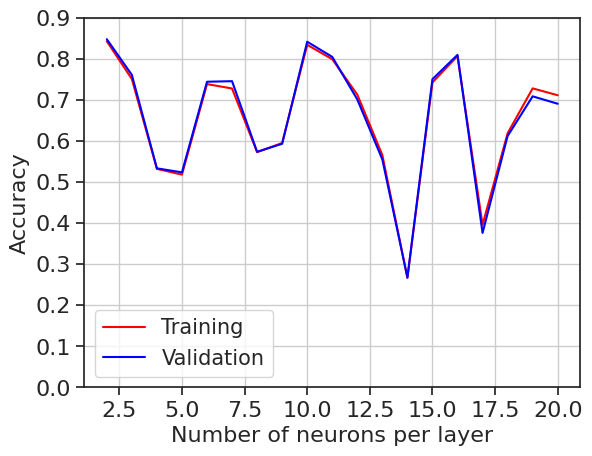

In [96]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.0,0.9)
plt.show()

#### Running for `num_epochs` = 25

In [97]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


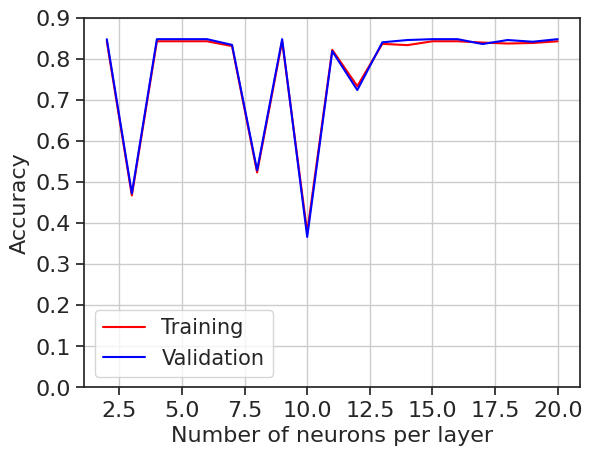

In [98]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.0,0.9)
plt.show()

### LEARNING CURVE: Varying training set size
<p style="font-size:16px;font-family:cambria">
Neural networks are known for their insatiable hunger for data! We plot the learning curve to see the expected variation of performance for smaller training set size. However, for this dataset, we also found that **by dialing the learning rate parameter higher, we can mostly smooth out this variation** i.e. make the network learn on a smaller subset of training data. **It is not recommended for all types of network and tuning the learning rate is an art.** But it worked for this dataset.

In [99]:
val_acc_train_size=[]
train_acc_train_size=[]

val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    percentage=i*0.01
    # Sampling
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,X_train_sampled,y_train_sampled,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)

    print(f"Done for: {i}% training set size")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 10% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 15% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 20% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 25% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 30% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 35% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 40% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 45% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 50% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 55% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 60% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 65% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 70% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 75% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 80% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 85% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 90% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 95% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 100% training set size


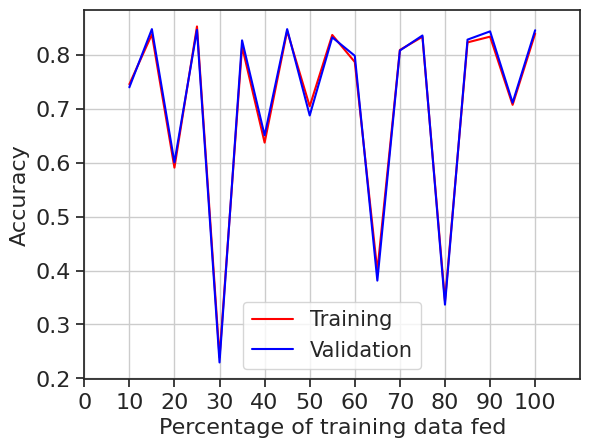

In [100]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.xlim(0,110)
plt.show()

#### To smooth out the dependence on training set size, can we tweak the learning rate?

In [101]:
val_acc_train_size=[]
train_acc_train_size=[]

val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    percentage=i*0.01
    # Sampling
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,X_train_sampled,y_train_sampled,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)

    print(f"Done for: {i}% training set size")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 10% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 15% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 20% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 25% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 30% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 35% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 40% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 45% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 50% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 55% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 60% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 65% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 70% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 75% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 80% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 85% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 90% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 95% training set size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done for: 100% training set size


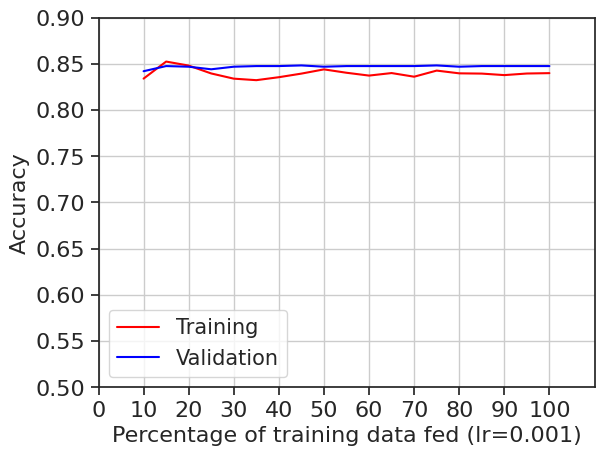

In [102]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed (lr=0.001)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,0.9)
plt.xlim(0,110)
plt.show()